## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('/home/user/Downloads/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)
print("rows",df.shape[0]) #no of rows
print("columns",df.shape[1]) #no of columns


(545, 13)
rows 545
columns 13


In [5]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [9]:
#4 Check for missing  values if any, replace with appropriate values
import pandas as pd
print(df.fillna(df.mean(numeric_only=True)).fillna(df.mode().iloc[0]))#uses to check the missing values and if any missing value is there then replaced by the other value
df.isnull().sum()#uses to check the null values

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y=df['price']
print(x,y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [28]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


<Figure size 800x500 with 0 Axes>

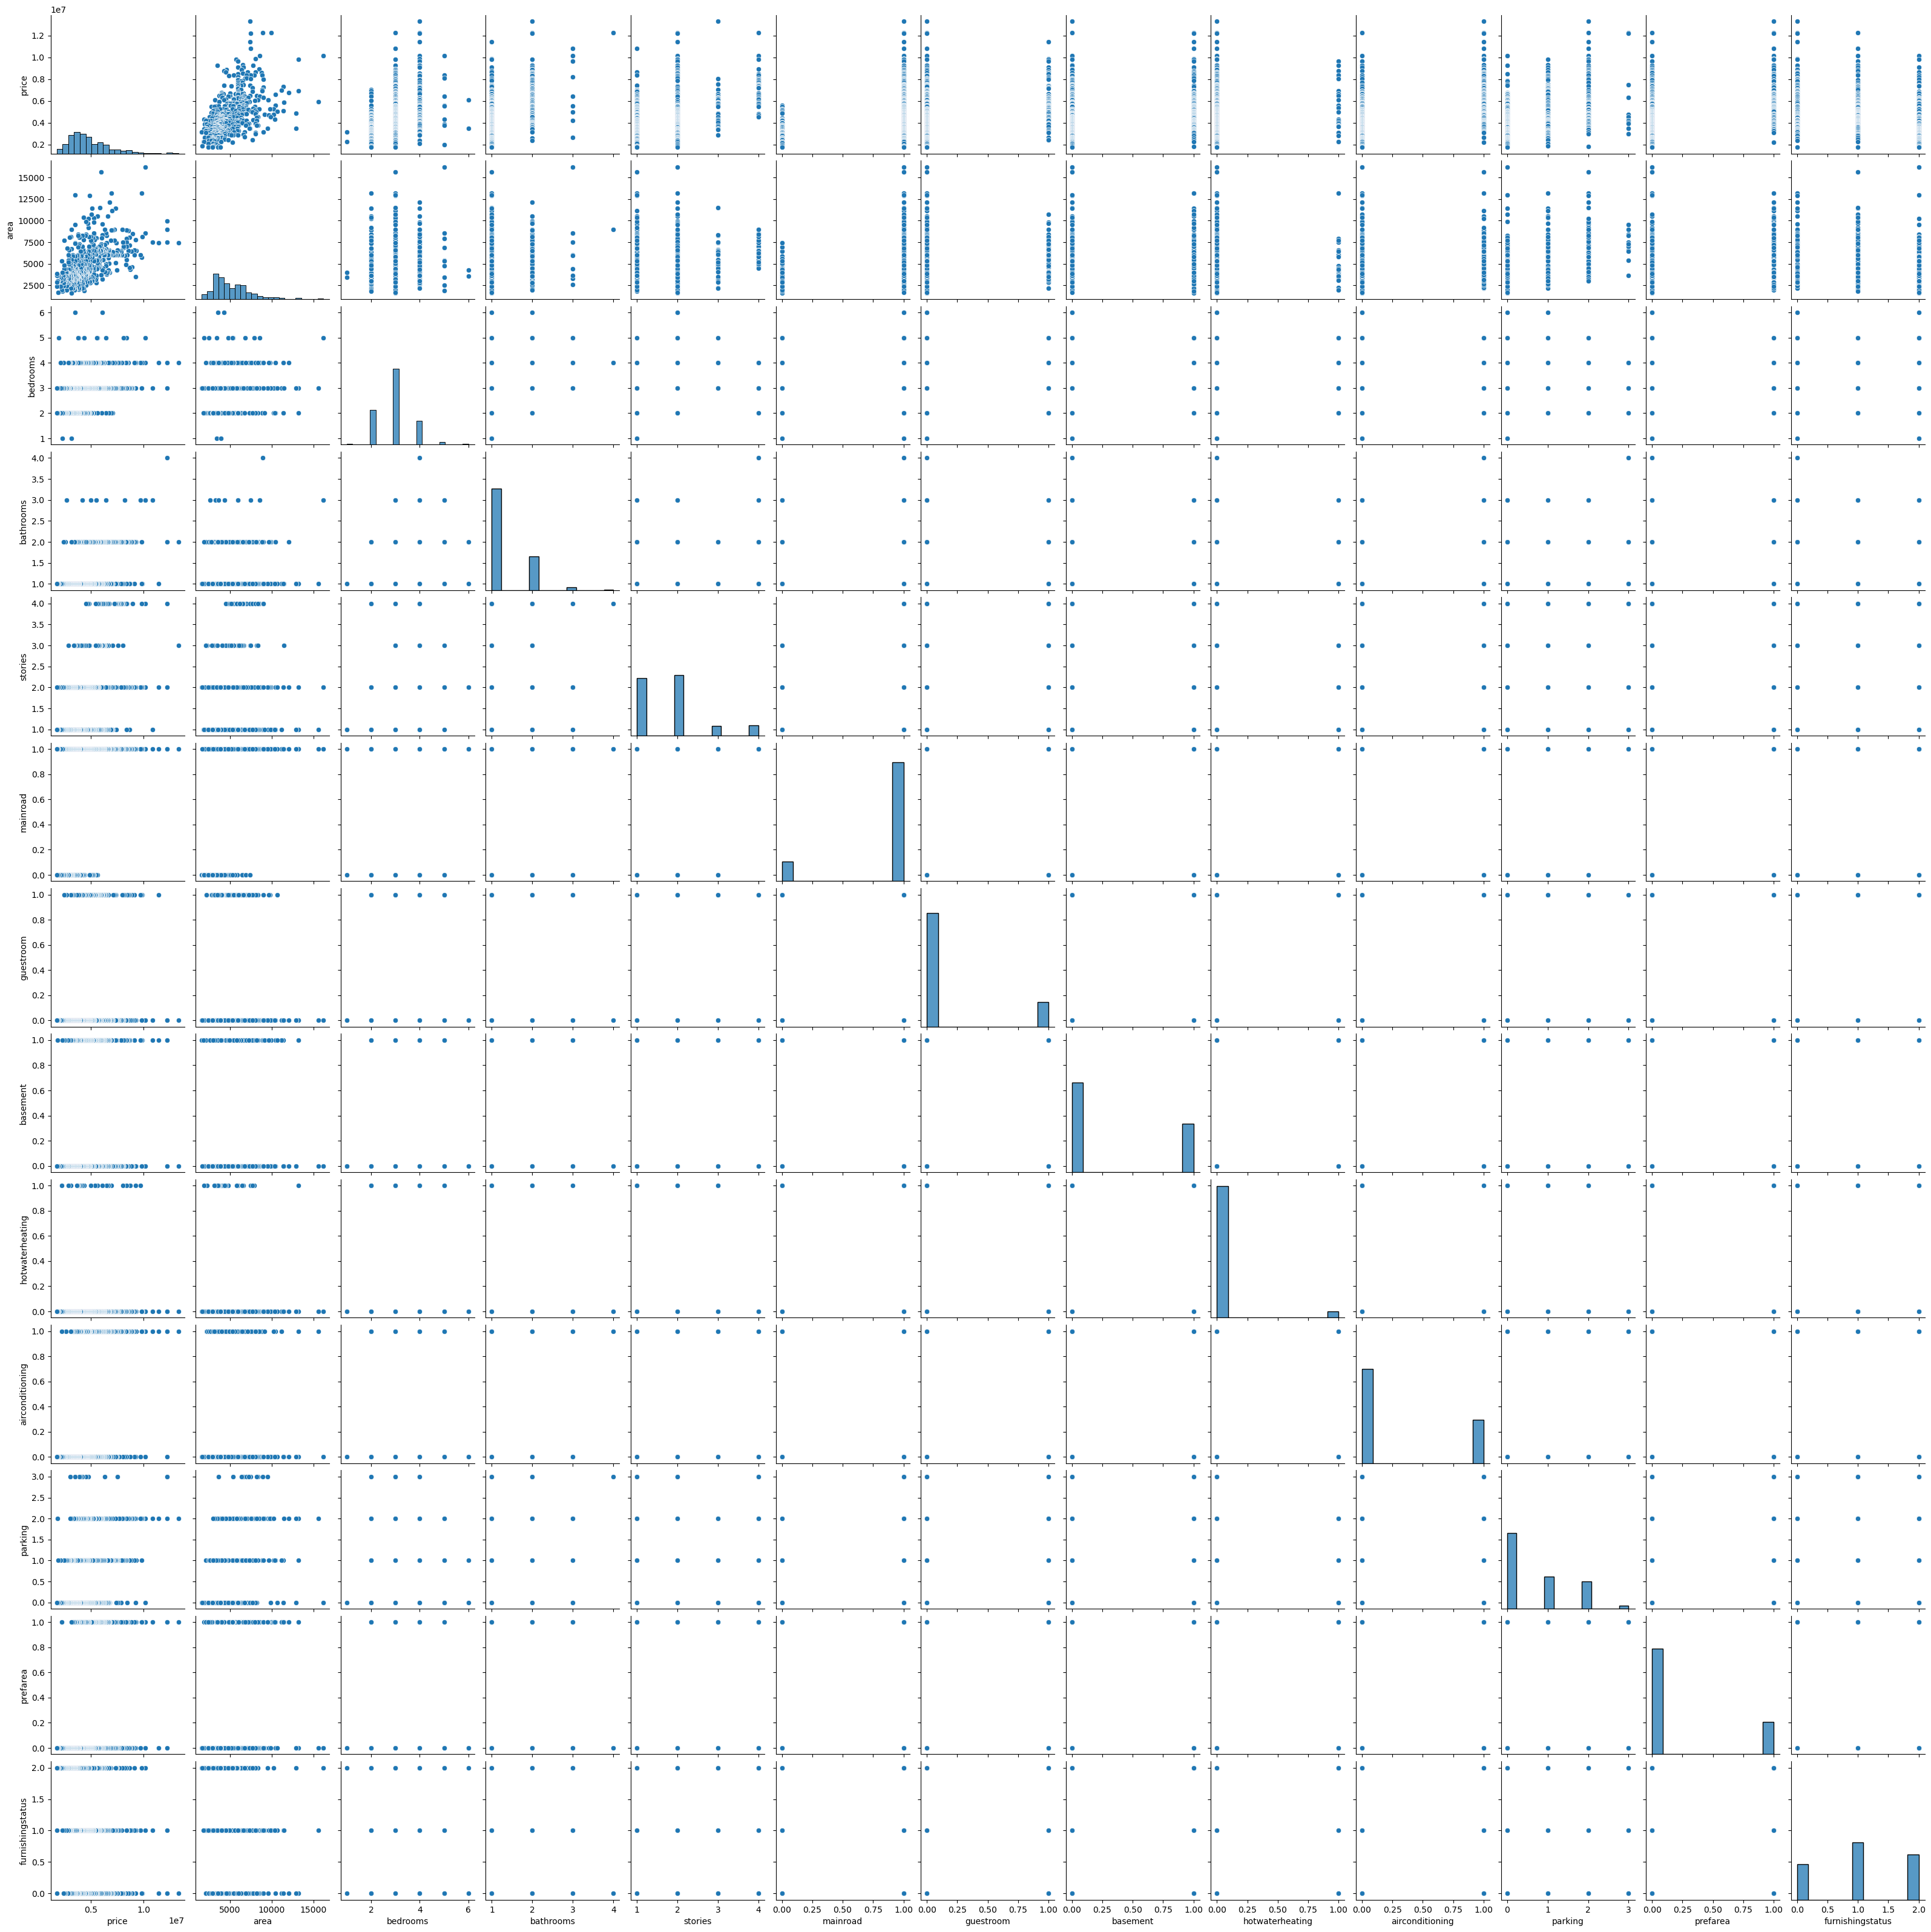

In [32]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.pairplot(df)

In [23]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['furnishingstatus']=l.fit_transform(df['furnishingstatus'])
b_c=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[b_c]=df[b_c].apply(lambda col: col.map({'yes':1,'no':0}))
x=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
print(x)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [ ]:
#8  Avoiding the Dummy Variable Trap


In [38]:
#9 Apply feature scaling on numerical variables
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
num_features = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
X = df[num_features]  # Independent variables
y = df['price']  # Dependent variable

# Standardization (Z-score scaling)
scaler = StandardScaler()
scalar= MinMaxScaler()
# Convert to DataFrame
X_standardized_df = scalar.fit_transform(df[num_features])


print("Standardized Features:\n", X_standardized_df)


Standardized Features:
 [[0.39656357 0.6        0.33333333 ... 0.66666667 1.         0.        ]
 [0.5024055  0.6        1.         ... 1.         0.         0.        ]
 [0.57113402 0.4        0.33333333 ... 0.66666667 1.         0.5       ]
 ...
 [0.13539519 0.2        0.         ... 0.         0.         1.        ]
 [0.08659794 0.4        0.         ... 0.         0.         0.        ]
 [0.15120275 0.4        0.         ... 0.         0.         1.        ]]


In [41]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
X=df.drop(columns=['price'])
Y=df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("x_train:\n",X_train)
print("x_test:\n",X_test)
print("y_train:\n",Y_train)
print("y_test:\n",Y_test)

x_train:
      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
126  7160         3          1        1         1          0         1   
363  3584         2          1        1         1          0         0   
370  4280         2          1        1         1          0         0   
31   7000         3          1        4         1          0         0   
113  9620         3          1        1         1          0         1   
..    ...       ...        ...      ...       ...        ...       ...   
71   6000         4          2        4         1          0         0   
106  5450         4          2        1         1          0         1   
270  4500         3          2        3         1          0         0   
435  4040         2          1        1         1          0         0   
102  5500         3          2        4         1          1         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
126                0    

In [44]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression

a=LinearRegression()
a.fit(X_train,Y_train)
print(a.intercept_)
print(a.coef_)

124157.75864095706
[ 2.53062328e+02  8.27348746e+04  1.11737287e+06  4.15801123e+05
  4.08320465e+05  2.79534041e+05  4.84980215e+05  6.19934347e+05
  6.80006921e+05  3.04078333e+05  5.09441464e+05 -1.98031325e+05]


In [49]:
#12 Predict on the train set and calculate the error = y_pred - y_train

y_pred = a.predict(X_train)
print("Predicted Values:", y_pred)
error=y_pred-Y_train
print(error.head(10))


Predicted Values: [ 5332298.80162373  3560000.36855074  4404360.98837882  6422828.76367875
  6350894.77980775  6125803.7400548   3154901.01336098  4641274.2767926
  8811989.65931224  5151873.94105849  7362142.90153429  8117826.44806162
  3323065.80214996  6980537.59138662  5358025.69101714  4519725.42144618
  3419875.40619322  4377646.55495528  6385788.92284523  5819537.0668614
  5258023.92404965  3835676.52871266  6749594.55318048  3217825.87201887
  3232110.43832742  3000311.50208293  8531123.97262171  6055252.83880228
  6263181.51388486  4355706.89446947  4899309.8183723   7461955.39104299
  5328194.73506062  4087447.07413147  2857431.11794584  8414396.76104224
  4547026.95451487  5155699.58974984  5750985.84469391  5445311.17081141
  2661054.75112931  5668149.26438808  3256024.39161894  4857095.26556867
  7102084.11357082  5724018.21510571  6186517.53781285  7952938.3569166
  8833420.5104383   6129740.77635873  6978873.93973872  4154162.90738914
  8327092.48681784  5302914.40372116

Text(0.5, 1.0, 'Residual Plot')

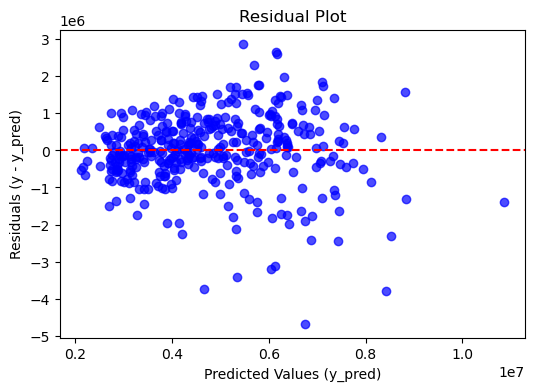

In [56]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, error, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='dashed')  # Reference line at y=0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y - y_pred)")
plt.title("Residual Plot")

In [60]:
#14  Predic on the test set
x_pred = a.predict(X_test)
print("Predicted Values:", x_pred[:10])


Predicted Values: [5407508.87024418 7097185.46706855 3055462.44314053 4476945.19636315
 3315983.65663579 3618373.03255259 5758111.46044028 6466502.43909126
 2830273.16469119 2588804.65810567]


In [63]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [65]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
m = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error (MSE):", m)
print("R-Squared (R²) Score:", r2)


Mean Squared Error (MSE): 1535047758428.049
R-Squared (R²) Score: 0.6435419628959109


In [66]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
import pandas as pd
import itertools
import statsmodels.api as sm


# Define independent variables
all_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement']
y = df['price']  # Target variable

# Store results
results = []

# Try different feature subsets
for i in range(1, len(all_features) + 1):  # Vary number of features used
    for feature_combo in itertools.combinations(all_features, i):  # Try all combinations
        X = df[list(feature_combo)]
        X = sm.add_constant(X)  # Add constant for intercept

        # Fit model
        model = sm.OLS(y, X).fit()

        # Store results
        results.append((feature_combo, model.rsquared, model.rsquared_adj))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Features', 'R2', 'Adjusted R2'])

# Sort by Adjusted R² descending
results_df = results_df.sort_values(by='Adjusted R2', ascending=False)

# Display best models
print(results_df.head(10))  # Show top 10 feature sets


                                              Features        R2  Adjusted R2
126  (area, bedrooms, bathrooms, stories, mainroad,...  0.586454     0.581063
124  (area, bathrooms, stories, mainroad, guestroom...  0.583182     0.578533
120  (area, bedrooms, bathrooms, stories, mainroad,...  0.580938     0.576264
109     (area, bathrooms, stories, mainroad, basement)  0.577869     0.573954
121  (area, bedrooms, bathrooms, stories, guestroom...  0.572416     0.567647
110    (area, bathrooms, stories, guestroom, basement)  0.570437     0.566452
119  (area, bedrooms, bathrooms, stories, mainroad,...  0.570494     0.565704
100     (area, bedrooms, bathrooms, stories, basement)  0.566271     0.562247
75                (area, bathrooms, stories, basement)  0.564484     0.561258
108    (area, bathrooms, stories, mainroad, guestroom)  0.564559     0.560520
